<h1>SI 305 Discussion 5: Data Exploration Review</h1>

This week we will be working with the water and sewage usage data from the University of Michigan Office of Campus Sustainability. You can learn more by viewing the data dictionary <a href = "https://docs.google.com/document/d/1hPKKJOVNvJ0LhGaTHpSvGD9w1eWBrTzrKMEeJcVJoug/edit?usp=sharing">here.</a>

As a reminder, solutions to previous discussion sections are posted on canvas. If you are working on your data exploration assignment and can't remember how to implement something or the exact syntax of a method, consider revisiting past weeks discussion sections.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1O6kQZJLnHUA4iLxdh0IU7JYl6qT4EArfIJHimxhKvtI/gviz/tq?tqx=out:csv")

In [3]:
df['Billing Date'] = pd.to_datetime(df['Billing Date'])

In [4]:
df.head()

,BID,Bname,AKA,Baddr1,City,ZIP,State,Building Grouping(s),Building Notes,Building Type,Building Gross Sq Ft,Utility Description,Reading Date,Reading Date Year,Reading Date FY,Reading,Billing Date,Billing Date FY,BillingDate Month,Billing Amount
0,5.0,NICHOLS ARBORETUM RESIDENCE COMPLEX,NaN,1827 GEDDES ROAD,ANN ARBOR,48104 1711,MI,NaN,NaN,Office,3384,Water,7/13/2009,2009,2010,7.0,2009-08-01,2010,Aug,$34.67
1,5.0,NICHOLS ARBORETUM RESIDENCE COMPLEX,NaN,1827 GEDDES ROAD,ANN ARBOR,48104 1711,MI,NaN,NaN,Office,3384,Water,8/18/2009,2009,2010,8.0,2009-09-01,2010,Sep,$40.07
2,5.0,NICHOLS ARBORETUM RESIDENCE COMPLEX,NaN,1827 GEDDES ROAD,ANN ARBOR,48104 1711,MI,NaN,NaN,Office,3384,Water,9/14/2009,2009,2010,4.0,2009-10-01,2010,Oct,$22.36
3,5.0,NICHOLS ARBORETUM RESIDENCE COMPLEX,NaN,1827 GEDDES ROAD,ANN ARBOR,48104 1711,MI,NaN,NaN,Office,3384,Water,10/20/2009,2009,2010,0.0,2009-11-01,2010,Nov,$4.67
4,5.0,NICHOLS ARBORETUM RESIDENCE COMPLEX,NaN,1827 GEDDES ROAD,ANN ARBOR,48104 1711,MI,NaN,NaN,Office,3384,Water,11/19/2009,2009,2010,0.0,2009-12-01,2010,Dec,$4.67


<h2>Question 1: Data Exploration & Manipulation</h2>
<h3>1.1</h3>
What is the average building size? What is the smallest building size in our dataset?

In [5]:
df['Building Gross Sq Ft'].mean()

140711.87683231742

<h3>1.2</h3>
The 'Building Grouping(s)' column organizes campus buildings by their department / affilitation. Show the median billing amount for every building that's gruping is 'Business'

Note that the column 'Billing Amount' is currently a string with non-numeric characters like commas and dollar signs. Remove these before converting billing amount to a float. 

<em>Hint: if you're having a hard time removing non-numeric characters from the billing column see <a href = "https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html">this page</a></em>


In [6]:
df['Billing Amount Numeric'] = df['Billing Amount'].str.replace("$", "").str.replace(",", "").astype(float)

In [7]:
business_buildings = df[df['Building Grouping(s)'] == 'Business']

business_buildings.groupby('Bname')['Billing Amount Numeric'].median()

Bname
BUSINESS ADMIN EXECUTIVE DORM    2059.905
KRESGE HALL                       836.740
ROSS SCHOOL OF BUSINESS          3058.500
WYLY SAM HALL                    1338.880
Name: Billing Amount Numeric, dtype: float64

<h3>1.3</h3>
Calculate the average monthly water bill for each year.

In [8]:
by_month = df.groupby(['Billing Date FY', 'BillingDate Month'])['Billing Amount Numeric'].mean()

by_month = by_month.reset_index()
by_month.groupby('Billing Date FY')['Billing Amount Numeric'].mean()

Billing Date FY
2010    1984.776151
2011    2383.883319
2012    2666.920433
2013    2794.593130
2014    2586.387463
2015    2575.036894
2016    2792.481537
2017    3101.040910
2018    2941.318423
2019    2921.607592
2020    2676.167291
2021    2379.286266
2022    3016.316446
2023    3215.795589
Name: Billing Amount Numeric, dtype: float64

<h2>Question 2: Plotting</h2>

Plot the relationship between building size and billing amount. There are multiple billing records for each building — we will just use the most recent ones from 6/1/2023. Note we have already converted the billing date column to a datetime for you.

Make sure to add descriptive labels to the axes and to give your plot a title.

Text(0.5, 1.0, 'June 2023 Water Bill vs Building Size')

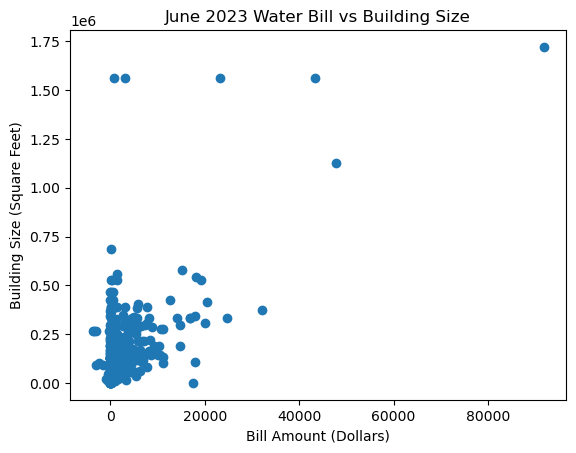

In [9]:
june_2023 = df[df['Billing Date'] == '06-01-2023']

plt.scatter(june_2023['Billing Amount Numeric'], june_2023['Building Gross Sq Ft'])

plt.xlabel('Bill Amount (Dollars)')
plt.ylabel('Building Size (Square Feet)')
plt.title("June 2023 Water Bill vs Building Size")

<h2>Question 3: Data Manipulation & Plotting</h2>
Calculate the average billing amount for the buildings that are classified as 'Residence Hall,' 'Classroom,' or 'Library' in the 'Buillding Type' column. Plot the relationship between billing amount and building type. 

<h3>3.1</h3>
Filter the dataframe to the three building types were are interested in. Aggregate the dataframe by month and find the mean billing amount. 

In [10]:
building_types = df[(df['Building Type'] == 'Residence Hall') | 
                    (df['Building Type'] == 'Classroom') |
                    (df['Building Type'] == 'Library')]



In [11]:
mean_by_btype = building_types.groupby('Building Type')['Billing Amount Numeric'].mean()

In [12]:
df.groupby('Building Type')['Billing Amount Numeric'].mean().sort_values(ascending = False)

Building Type
Clinical          10434.587717
Laboratory         5948.595596
Apartment          5312.413756
Residence Hall     4291.322499
Stadium            3213.886784
Classroom          2791.049212
Union              2557.258030
Library            2122.669364
Office             1417.580795
Rec Sports         1281.555519
Medical Office     1239.645529
Museum             1146.197146
Performance         761.256087
Support             705.887201
Athletics           626.735043
Parking             433.433963
Residence           104.342230
Name: Billing Amount Numeric, dtype: float64

<h3>3.2</h3>
Create a bar plot that shows the mean for each building type. Make sure to add descriptive labels to the axes and to give your plot a title.

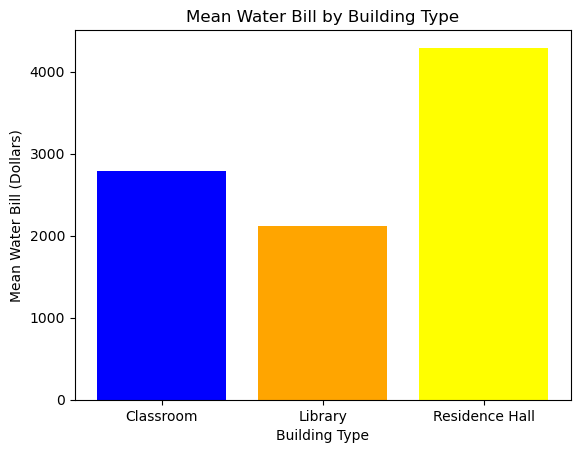

In [13]:
plt.bar(x = mean_by_btype.index, height = mean_by_btype.values, color = ['blue', 'orange', 'yellow'])

plt.title("Mean Water Bill by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Mean Water Bill (Dollars)")

plt.show()